# import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [2]:
data = pd.read_csv('E:/Data Science/portofolio/project-2/dataset/Walmart_customer_purchases.csv')
data.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


# Cleaning Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer_ID       50000 non-null  object 
 1   Age               50000 non-null  int64  
 2   Gender            50000 non-null  object 
 3   City              50000 non-null  object 
 4   Category          50000 non-null  object 
 5   Product_Name      50000 non-null  object 
 6   Purchase_Date     50000 non-null  object 
 7   Purchase_Amount   50000 non-null  float64
 8   Payment_Method    50000 non-null  object 
 9   Discount_Applied  50000 non-null  object 
 10  Rating            50000 non-null  int64  
 11  Repeat_Customer   50000 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 4.6+ MB


tipe kolom Purchase_Date harus diganti menjadi datetime

In [4]:
data.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


In [5]:
data.duplicated().sum()

0

In [6]:
# ubah tipe  data pada kolom purchase_date
data_cleaned = data.copy()
data_cleaned['Purchase_Date'] = pd.to_datetime(data_cleaned['Purchase_Date'])

# cek apakah sudah benar
data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Customer_ID       50000 non-null  object        
 1   Age               50000 non-null  int64         
 2   Gender            50000 non-null  object        
 3   City              50000 non-null  object        
 4   Category          50000 non-null  object        
 5   Product_Name      50000 non-null  object        
 6   Purchase_Date     50000 non-null  datetime64[ns]
 7   Purchase_Amount   50000 non-null  float64       
 8   Payment_Method    50000 non-null  object        
 9   Discount_Applied  50000 non-null  object        
 10  Rating            50000 non-null  int64         
 11  Repeat_Customer   50000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(8)
memory usage: 4.6+ MB


In [7]:
# memisahkan tahun, bulan, dan hari
data_cleaned['year'] = data_cleaned['Purchase_Date'].dt.year
data_cleaned['month'] = data_cleaned['Purchase_Date'].dt.month
data_cleaned['day'] = data_cleaned['Purchase_Date'].dt.day

In [8]:
data_cleaned.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,year,month,day
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes,2024,8,30
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No,2024,12,21
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No,2024,12,26
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes,2024,11,4
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes,2024,10,7


# Exploratory Data Analysis

## statistik deskriptif

In [9]:
# analisis deskriptif statistik untuk numerical values
data_cleaned.describe()

,Age,Purchase_Date,Purchase_Amount,Rating,year,month,day
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,38.945220,2024-08-10 17:54:09.216000512,255.532230,2.998680,2024.109340,6.520820,15.766240
min,18.000000,2024-02-10 00:00:00,10.010000,1.000000,2024.000000,1.000000,1.000000
25%,28.000000,2024-05-11 00:00:00,133.050000,2.000000,2024.000000,4.000000,8.000000
50%,39.000000,2024-08-11 00:00:00,255.045000,3.000000,2024.000000,7.000000,16.000000
75%,50.000000,2024-11-10 00:00:00,378.912500,4.000000,2024.000000,10.000000,23.000000
max,60.000000,2025-02-09 00:00:00,499.990000,5.000000,2025.000000,12.000000,31.000000
std,12.398137,NaN,141.574416,1.417956,0.312068,3.455431,8.805999


**Age**
- umur termuda yaitu 18 tahun dan umur tertua 60 tahun
- rata-rata umur customer adalah 38.9 tahun 

**Purchase_Date**
- record data dimulai pada 2024-02-10 dan berakhir pada 2025-02-09

**Purchase_AMount**
- customer paling sedikit menghabiskan 10.1 dan paling banyak 499.99
- rata-rata customer berbelanja menghabiskan 255.53

**Rating**
- rating terendah yaitu 1 dan tertinggi yaitu 5
- rata-rata rating yang diberikan customer yaitu 2.99

In [10]:
# memisahkan kolom categorical values
data_cleaned_cat = data_cleaned.select_dtypes(include='object')
cat_columns = data_cleaned_cat.drop('Customer_ID', axis=1).columns


#mengambil kolom numerical values
num_columns = ['Age', 'Purchase_Amount', 'Rating']

## visualisasi distributif data

### numeric

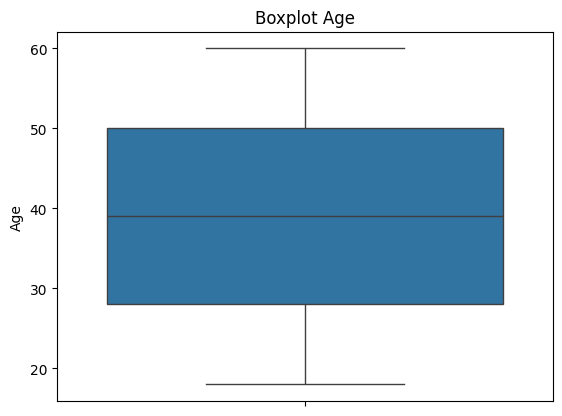

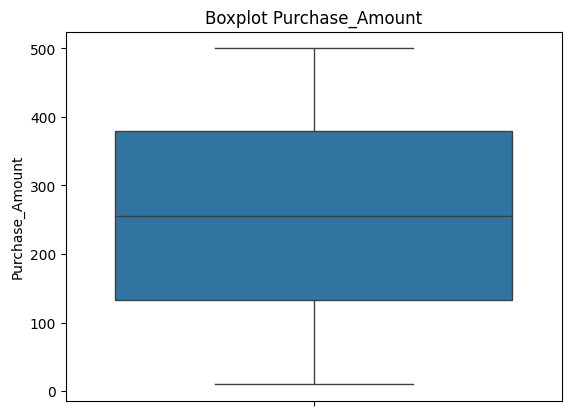

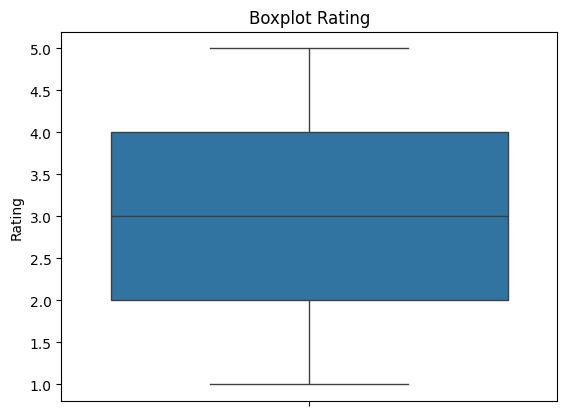

In [11]:
for i in num_columns:
    sns.boxplot(data_cleaned[i])
    plt.title(f'Boxplot {i}')
    plt.show()

dari visualisasi boxplot diatas, tidak ada outlier

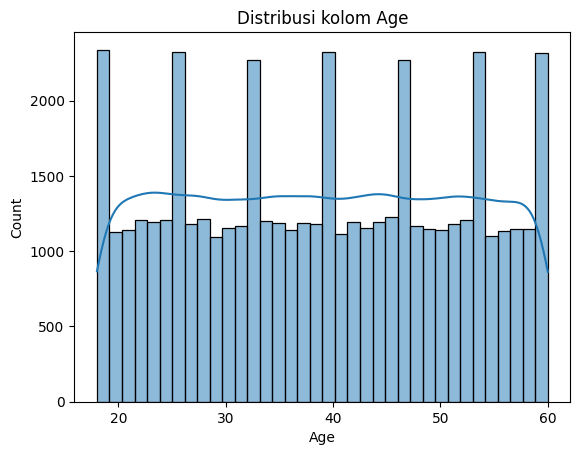

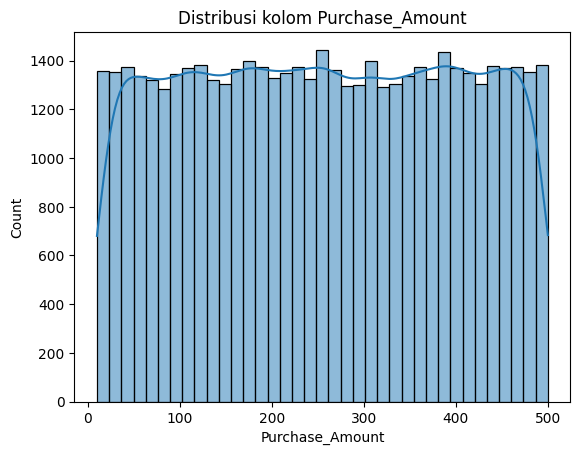

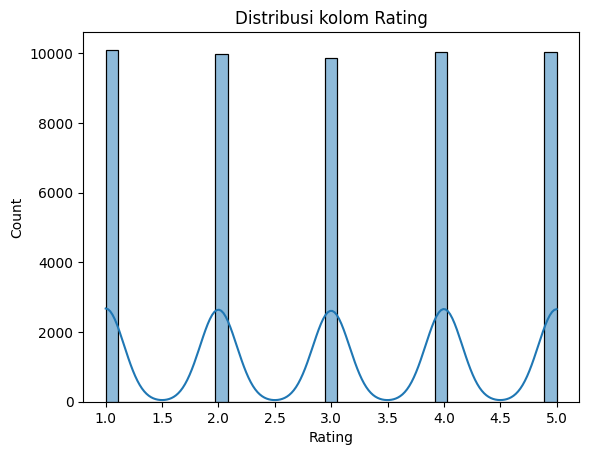

In [12]:
for i in num_columns:
    sns.histplot(data_cleaned[i],kde=True)
    plt.title(f'Distribusi kolom {i}')
    plt.show()

### kategori

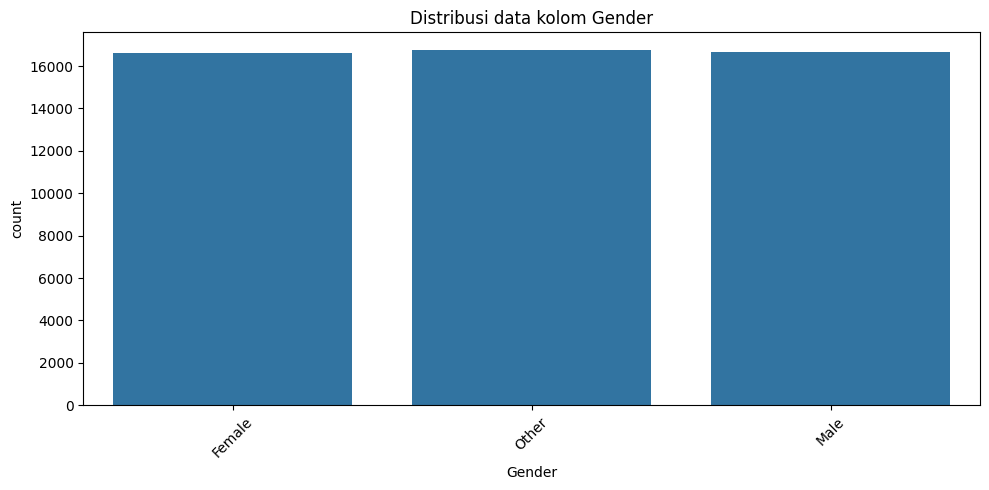

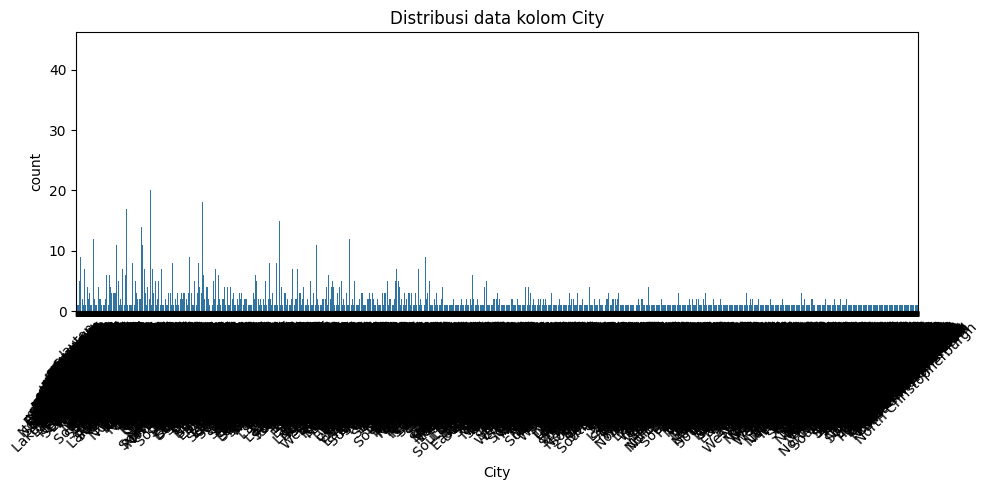

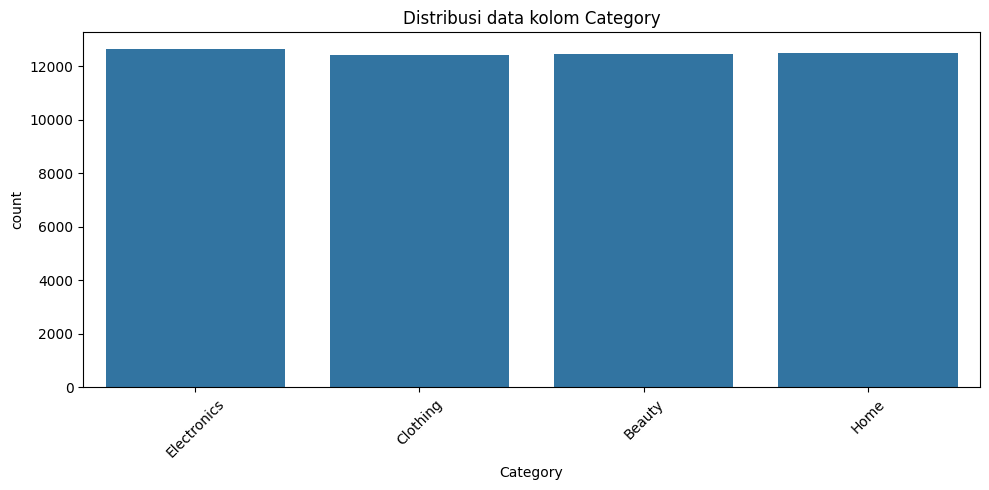

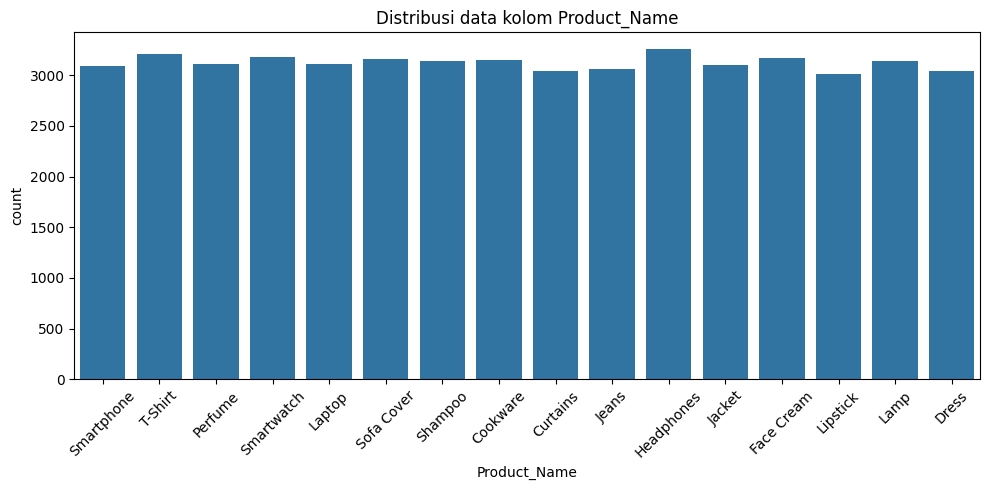

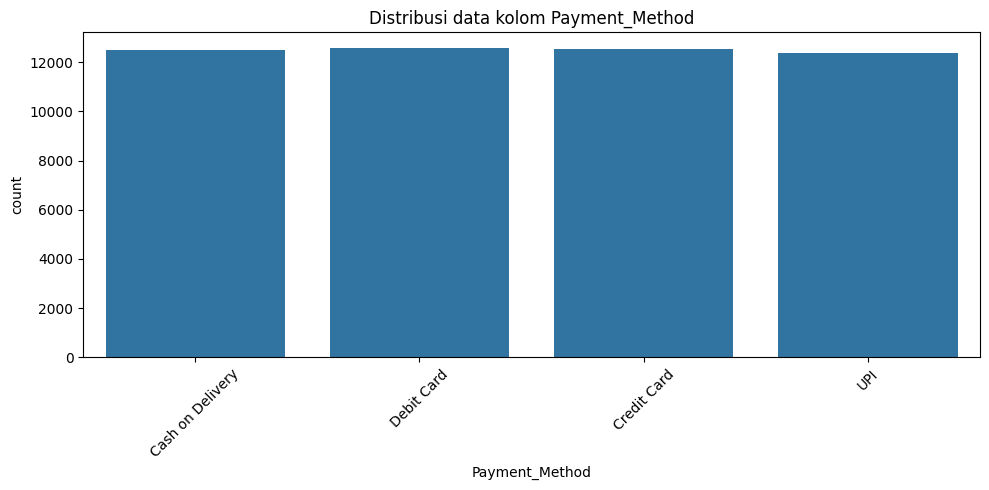

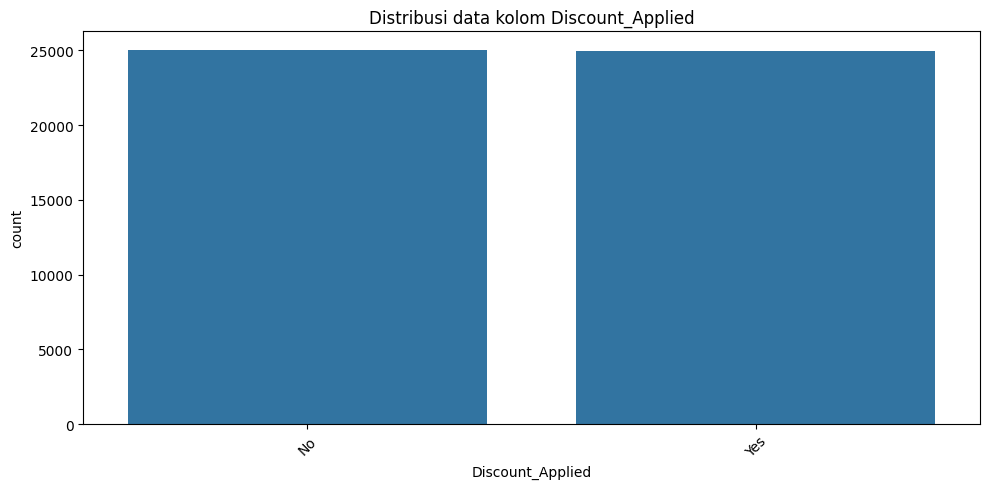

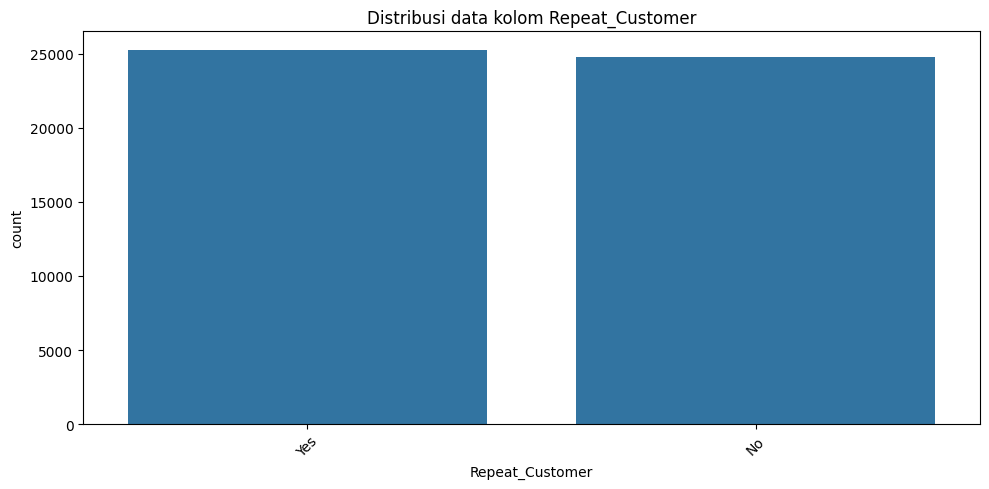

In [13]:
for col in cat_columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=data_cleaned)
    plt.title(f'Distribusi data kolom {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

- berdasarkan hasil visualisasi kolom kategoris, selain kolom city, data cenderung seimbang antar kategori. 
- berdasarkan hasil visualisasi kolom City, pada kolom tersebut terlihat berasal dari berbagai kota dan distribusi antar kota tidak seimbang

## analisis hubungan antar fitur

<Axes: >

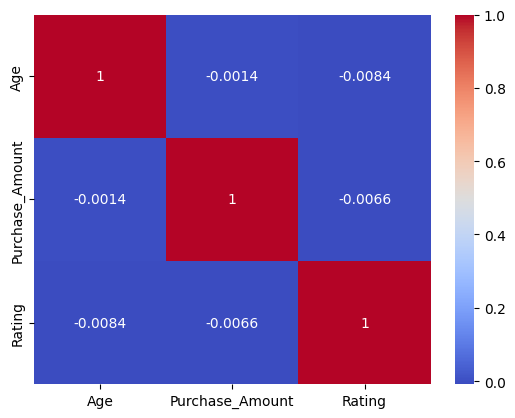

In [14]:
sns.heatmap(data_cleaned[num_columns].corr(), annot=True, cmap='coolwarm')

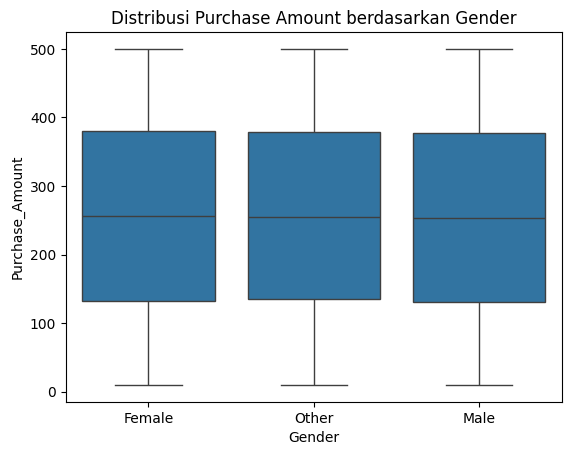

In [16]:
# melihat hubungan antara gender dan purchase
sns.boxplot(x='Gender', y='Purchase_Amount', data=data_cleaned)
plt.title('Distribusi Purchase Amount berdasarkan Gender')
plt.show()

In [17]:
data_cleaned.groupby('Gender')['Purchase_Amount'].mean()

Gender
Female    256.382360
Male      254.230838
Other     255.982589
Name: Purchase_Amount, dtype: float64

dari hasil visualisasi diatas, rata-rata jumlah pembelian tiap gender memiliki rata-rata yang hampir sama

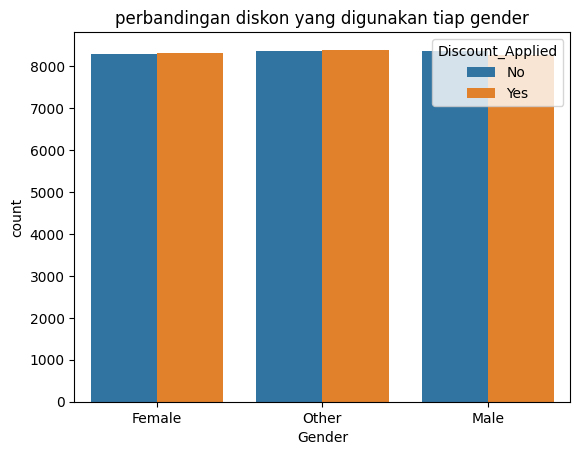

In [19]:
# melihat hubungan gender dengan Discount_Applied
sns.countplot(x='Gender', hue='Discount_Applied', data=data_cleaned)
plt.title('perbandingan diskon yang digunakan tiap gender')
plt.show()

dari visualisasi diatas, antara customer yang menggunakan diskon dengan yang tidak cenderung sama untuk setiap gender

Repeat_Customer
No     6313865.62
Yes    6462745.86
Name: Purchase_Amount, dtype: float64


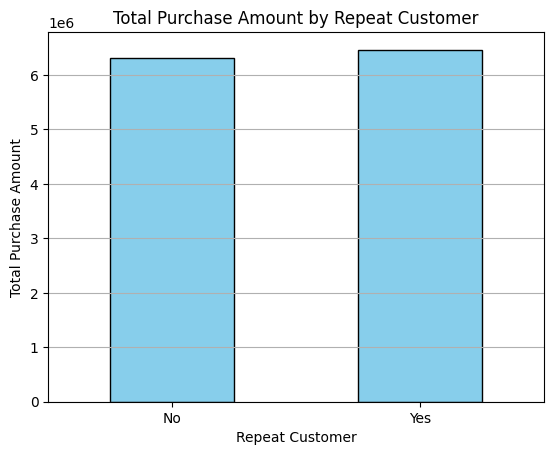

In [21]:
repeat_purchase = data_cleaned.groupby('Repeat_Customer')['Purchase_Amount'].sum()
print(repeat_purchase)
repeat_purchase.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Purchase Amount by Repeat Customer')
plt.xlabel('Repeat Customer')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

dari visualisasi diatas, jumlah total purchase amount lebih besar untuk repeat customer

Product_Name
Headphones    846878.56
Smartwatch    815327.06
Shampoo       807428.81
T-Shirt       806845.23
Sofa Cover    806825.96
Smartphone    806437.27
Face Cream    804426.24
Lamp          804282.65
Cookware      802796.26
Perfume       794545.57
Jeans         792432.80
Laptop        792045.20
Curtains      781312.64
Jacket        777477.61
Dress         769222.34
Lipstick      768327.28
Name: Purchase_Amount, dtype: float64


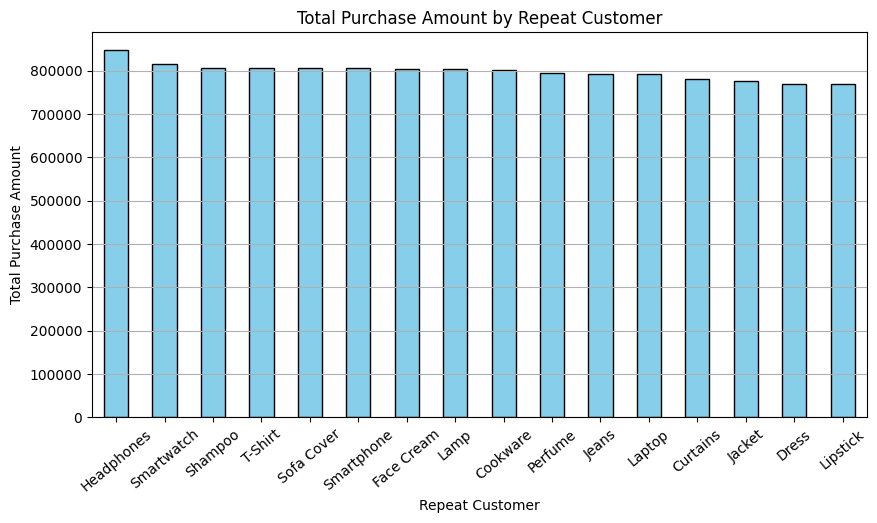

In [28]:
repeat_purchase = data_cleaned.groupby('Product_Name')['Purchase_Amount'].sum().sort_values(ascending=False)
print(repeat_purchase)
plt.figure(figsize=(10,5))
repeat_purchase.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Purchase Amount by Repeat Customer')
plt.xlabel('Repeat Customer')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=40)
plt.grid(axis='y')
plt.show()

produk yang menghasilkan pendapatan tertinggi adalah headphones sedangkan yang paling rendah adalah lipstick

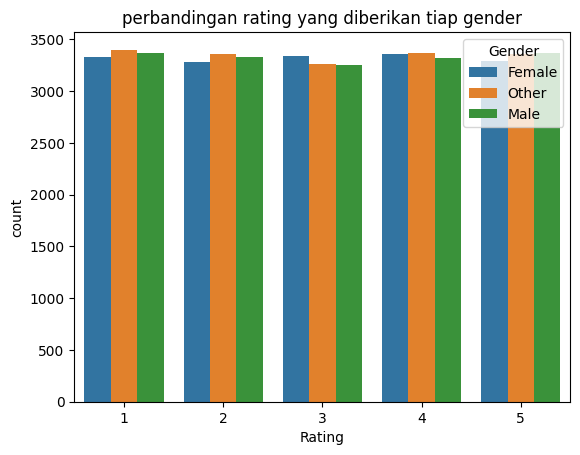

In [30]:
# melihat hubungan gender dengan Discount_Applied
sns.countplot(x='Rating', hue='Gender', data=data_cleaned)
plt.title('perbandingan rating yang diberikan tiap gender')
plt.show()

rating 1 dan 2 lebih banyak diberikan oleh gender other

In [31]:
data_cleaned.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer,year,month,day
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes,2024,8,30
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No,2024,12,21
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No,2024,12,26
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes,2024,11,4
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes,2024,10,7


year
2024    11403438.49
2025     1373172.99
Name: Purchase_Amount, dtype: float64


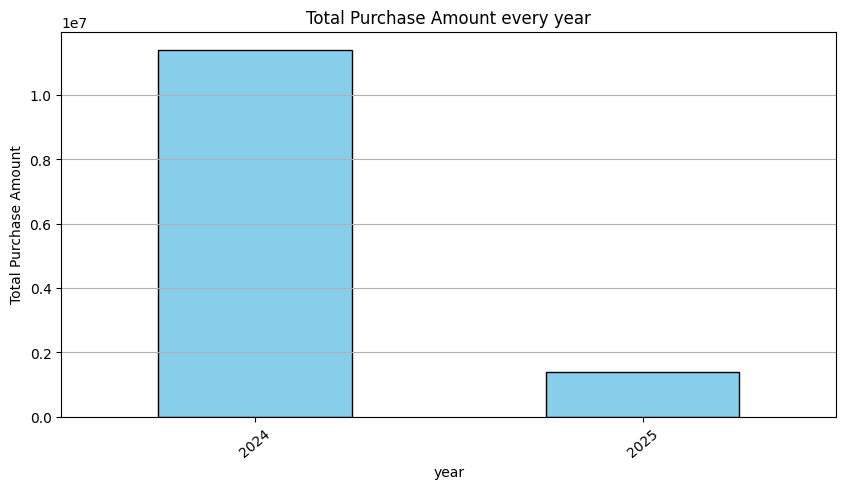

In [34]:
# mencari pendapatan tiap tahun
annual_income = data_cleaned.groupby('year')['Purchase_Amount'].sum()
print(annual_income)
plt.figure(figsize=(10,5))
annual_income.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Purchase Amount every year')
plt.xlabel('year')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=40)
plt.grid(axis='y')
plt.show()


pendapatan pada tahun 2024 lebih banyak dari tahun 2025. Hal ini karena, data tahun 2025 hanya tercatat sampai 9 februari 2025

## Insight Awal
- Purchase_Amount dengan Age tidak memiliki hubungan positif atau negatif karena nilai kolerasinya mendekati 0
- rata-rata jumlah pembelian tiap gender memiliki rata-rata yang hampir sama
- antara customer yang menggunakan diskon dengan yang tidak cenderung sama untuk setiap gender
- jumlah total purchase amount lebih besar untuk repeat customer
- produk yang menghasilkan pendapatan tertinggi adalah headphones sedangkan yang paling rendah adalah lipstick
- rating 1 dan 2 lebih banyak diberikan oleh gender other
- pendapatan 2024 lebih banyak dari 2025 karena data 2025 tidak full